In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [2]:
train = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_train_data_VT.csv', sep=',')

In [3]:
train.head()

,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,Protocol,SrcIPAddress,SrcPort,DestIPAddress,DestPort,State,DestTypeService
0,-0.008024,-0.008615,-0.003897,-0.296301,-0.308511,-0.141071,11.0,5663.0,123467.0,475015.0,57944.0,120.0,0.0
1,-0.010103,-0.008919,-0.004151,-0.296351,-0.308520,-0.141076,11.0,5663.0,123658.0,46220.0,34823.0,327.0,4.0
2,-0.010363,-0.008918,-0.004149,-0.296351,-0.308520,-0.141076,11.0,5663.0,123546.0,76319.0,34823.0,327.0,4.0
3,-0.010363,-0.008917,-0.004151,-0.296351,-0.308520,-0.141076,11.0,5663.0,123606.0,452301.0,34823.0,327.0,4.0
4,-0.010623,-0.008919,-0.004149,-0.296351,-0.308520,-0.141076,11.0,5663.0,123487.0,79211.0,34823.0,327.0,4.0


In [4]:
# set isolation = 0.01
isolation_forest = IsolationForest(contamination=0.01)

In [5]:
isolation_forest.fit(train)

IsolationForest(contamination=0.01)

### Test

In [6]:
test = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_test_data_VT.csv', sep=',')

In [7]:
test_predict = isolation_forest.predict(test)
decision_function = isolation_forest.decision_function(test)

In [8]:
test['anomaly'] = test_predict
test['score'] = decision_function

In [9]:
test['anomaly'].value_counts()

 1    1046516
-1       7329
Name: anomaly, dtype: int64

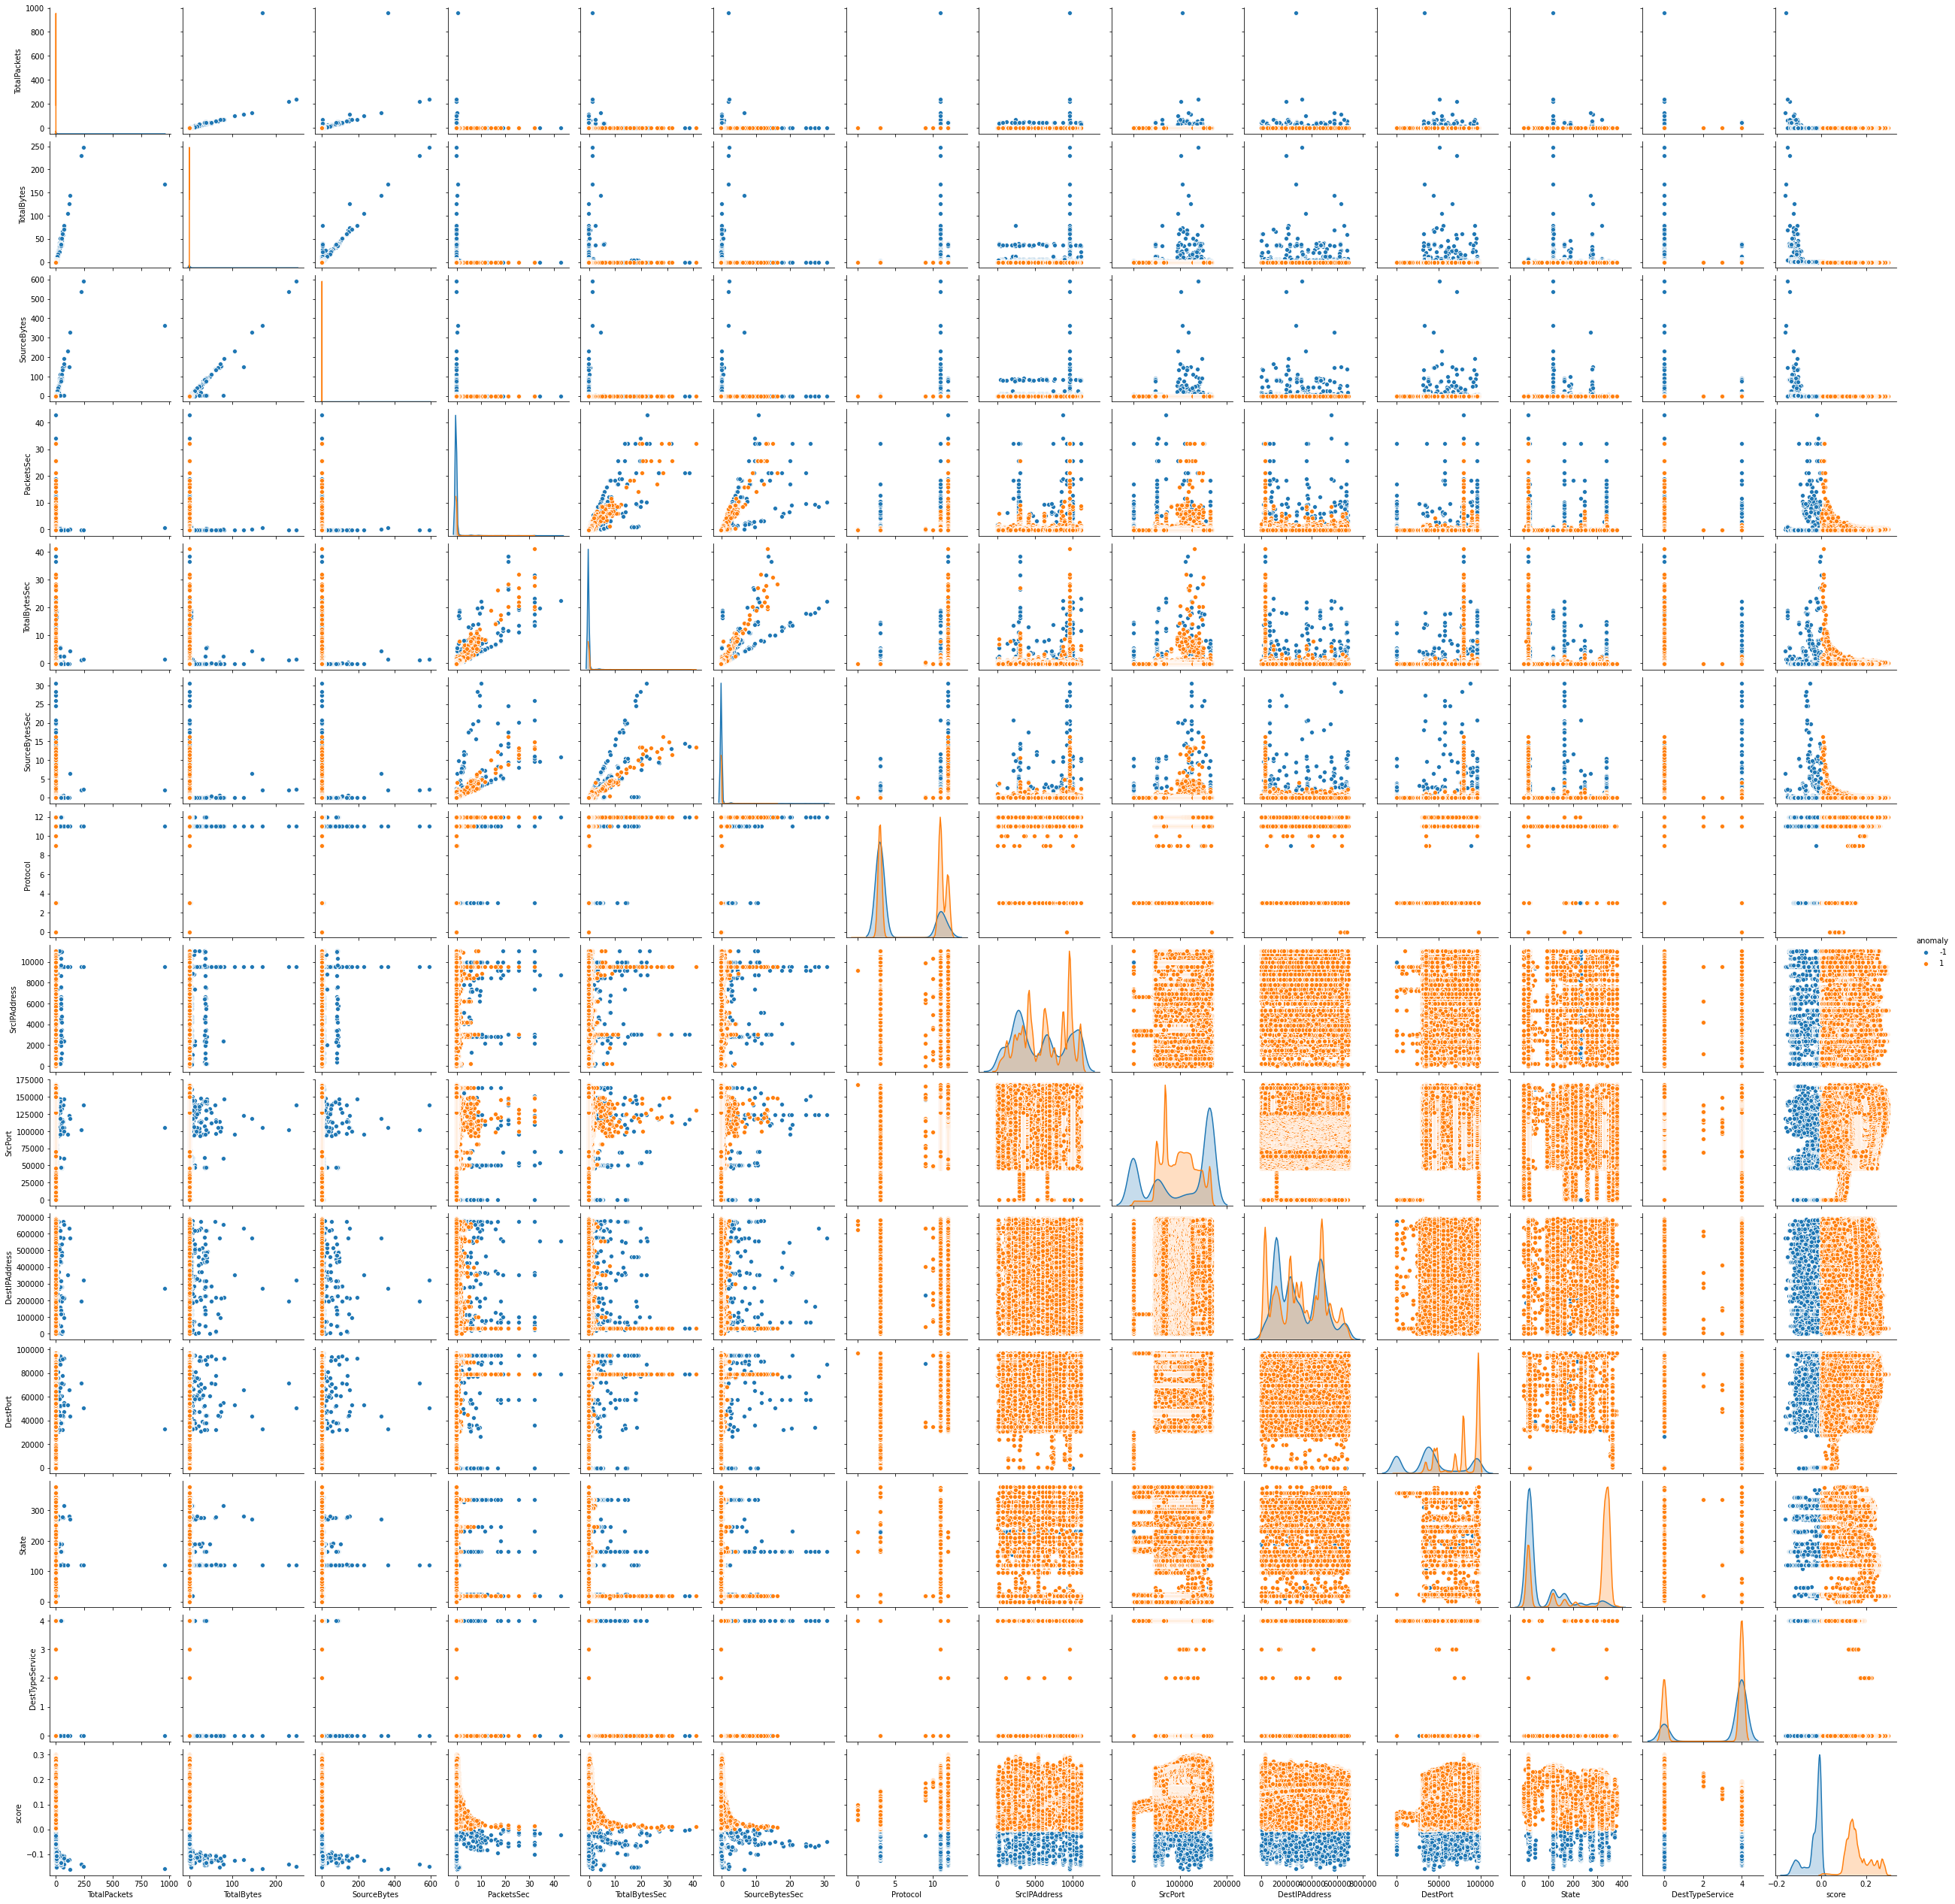

In [10]:
sns.pairplot(test, hue = 'anomaly')

In [11]:
anomalies = test.loc[test['anomaly'] == -1]

In [12]:
anomalies.head()

,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,Protocol,SrcIPAddress,SrcPort,DestIPAddress,DestPort,State,DestTypeService,anomaly,score
249,0.386255,0.306761,0.016051,-0.260652,0.008747,-0.128602,11.0,3047.0,46659.0,497552.0,83669.0,120.0,0.0,-1,-0.076222
1969,0.210038,0.205792,0.007113,-0.240186,0.302055,-0.121371,11.0,1145.0,46473.0,479317.0,95103.0,308.0,0.0,-1,-0.069273
2167,0.926341,0.773874,0.038746,-0.294399,-0.290668,-0.140475,11.0,1145.0,48257.0,90603.0,95103.0,316.0,0.0,-1,-0.084862
2173,2.152062,1.935432,0.116060,-0.286895,-0.213803,-0.137483,11.0,1145.0,48316.0,83369.0,95103.0,120.0,0.0,-1,-0.097085
2458,0.143762,0.113348,0.005850,-0.295808,-0.304096,-0.140853,11.0,1145.0,48965.0,477547.0,95103.0,156.0,0.0,-1,-0.013805


In [13]:
original_test = pd.read_csv('../../ml-data/cyberattack_detection/1_raw_data/A2_1/clean_test_data', sep=',')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
anomalies_orig_feat = original_test[original_test.index.isin(anomalies.index)]

In [15]:
anomalies_orig_feat = anomalies_orig_feat.merge(anomalies[['score']], left_index = True, right_index=True)

In [16]:
anomalies_orig_feat.head(10)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,score
249,2012/12/01 13:34:30.899435,1.850078,tcp,153.217.92.157,1040,->,207.177.143.150,5678,FSPA_FSPA,0.0,0.0,1528,1201775,33613,825.911124,6.495807e+05,18168.423169,-0.076222
1969,2012/12/01 14:14:22.366222,0.653870,tcp,132.200.95.181,1030,->,204.136.12.18,80,SRPA_FSPA,0.0,0.0,850,817410,18766,1299.952590,1.250111e+06,28699.894474,-0.069273
2167,2012/12/01 14:15:57.442042,81.530454,tcp,132.200.95.181,1122,->,135.85.246.76,80,SRPA_SPA,0.0,0.0,3606,2979963,71307,44.228872,3.655031e+04,874.605703,-0.084862
2173,2012/12/01 14:16:01.911863,38.167989,tcp,132.200.95.181,1125,->,134.238.251.2,80,FSPA_FSPA,0.0,0.0,8322,7401735,199720,218.036114,1.939252e+05,5232.657136,-0.097085
2458,2012/12/01 14:17:20.186253,51.397425,tcp,132.200.95.181,1158,->,203.67.89.224,80,FSRPA_SPA,0.0,0.0,595,465500,16669,11.576455,9.056874e+03,324.315858,-0.013805
5493,2012/12/01 15:17:43.869385,901.299652,udp,232.48.94.183,1041,->,127.57.106.59,161,INT,0.0,NaN,177261,137681814,142577909,196.672660,1.527592e+05,158191.461279,-0.136539
5494,2012/12/01 15:17:44.068502,881.089051,udp,168.188.94.155,1041,->,127.57.106.59,161,INT,0.0,NaN,164582,140522272,135525057,186.793832,1.594870e+05,153815.391130,-0.130944
6228,2012/12/01 15:33:31.973870,196.589972,udp,232.48.94.183,1043,->,127.57.106.59,161,INT,0.0,NaN,19556,18048478,19962182,99.476081,9.180772e+04,101542.219051,-0.131238
6229,2012/12/01 15:33:32.045862,184.354763,udp,168.188.94.155,1043,->,127.57.106.59,161,INT,0.0,NaN,19173,18865197,20727332,104.000568,1.023309e+05,112431.768307,-0.126021
6316,2012/12/01 15:37:06.018711,157.519690,udp,168.188.94.155,1044,->,127.57.106.59,161,INT,0.0,NaN,15711,15516547,16696008,99.739912,9.850544e+04,105993.149174,-0.126021


In [17]:
import numpy as np
anomalies_orig_feat.loc[anomalies_orig_feat['PacketsSec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Duration,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,PacketsSec,TotalBytesSec,SourceBytesSec,score
count,7329,7325,1594,7329,7329,7329,7329,7329,7329,7329
mean,808.481,0,0,3857.5,3.25118e+06,2.73358e+06,6279.97,455014,236690,-0.0321926
std,557.112,0,0,49502.2,2.53553e+07,2.4009e+07,47739,3.31568e+06,1.91666e+06,0.037702
min,4e-06,0,0,1,57,0,0.00691632,2.37377,0,-0.162364
25%,472.071,0,0,31,32388,30574,0.0359225,37.2245,36.8292,-0.0388015
50%,934.119,0,0,39,40015,38775,0.0433449,44.9003,44.6575,-0.0153954
75%,999.238,0,0,321,177942,50868,2.52646,2023.23,789.599,-0.00592946
max,3858.04,0,0,3.68056e+06,9.45069e+08,9.83047e+08,1e+06,7.925e+07,4.492e+07,-4.07768e-06


In [18]:
anomalies_orig_feat['SrcIPAddress'].nunique()

124

In [19]:
anomalies_orig_feat.to_csv('../4 Results/A1_test_iForest0.01_VT_orig_feat.csv', sep=',')

End